# Ocean Color from ESA

https://esa-oceancolour-cci.org/

daily data:
https://rsg.pml.ac.uk/thredds/dodsC/CCI_ALL-v4.1-DAILY

In [1]:
import xarray as xr
import datetime
import matplotlib.pyplot as plt
import pandas as pd

import matplotlib.colors as colors

import cartopy 
import cartopy.crs as ccrs

# import netcdf4
%matplotlib inline

# load and slice a small region

In [6]:
url = 'https://rsg.pml.ac.uk/thredds/dodsC/CCI_ALL-v4.1-DAILY'
url = 'https://rsg.pml.ac.uk/thredds/dodsC/CCI_ALL-v5.0-MONTHLY'
url = 'https://rsg.pml.ac.uk/thredds/dodsC/CCI_ALL-v5.0-DAILY'

data = xr.open_dataset(url).sel(lat=slice(72,70), lon=slice(-168,-150), time=slice('07-28-2017', '08-20-2017'))

print(data.nbytes/10**6)
data

183.14448


<xarray.Dataset>
Dimensions:             (lat: 48, lon: 432, time: 24)
Coordinates:
  * lat                 (lat) float64 71.98 71.94 71.9 ... 70.1 70.06 70.02
  * lon                 (lon) float64 -168.0 -167.9 -167.9 ... -150.1 -150.0
  * time                (time) datetime64[ns] 2017-07-28 ... 2017-08-20
Data variables:
    crs                 (time) int32 ...
    MODISA_nobs         (time, lat, lon) float32 ...
    VIIRS_nobs          (time, lat, lon) float32 ...
    OLCI_nobs           (time, lat, lon) float32 ...
    MERIS_nobs          (time, lat, lon) float32 ...
    SeaWiFS_nobs        (time, lat, lon) float32 ...
    total_nobs          (time, lat, lon) float32 ...
    Rrs_412             (time, lat, lon) float32 ...
    Rrs_443             (time, lat, lon) float32 ...
    Rrs_490             (time, lat, lon) float32 ...
    Rrs_510             (time, lat, lon) float32 ...
    Rrs_560             (time, lat, lon) float32 ...
    Rrs_665             (time, lat, lon) float32 ...
    water_class1        (time, lat, lon) float32 ...
    water_class2        (time, lat, lon) float32 ...
    water_class3        (time, lat, lon) float32 ...
    water_class4        (time, lat, lon) float32 ...
    water_class5        (time, lat, lon) float32 ...
    water_class6        (time, lat, lon) float32 ...
    water_class7        (time, lat, lon) float32 ...
    water_class8        (time, lat, lon) float32 ...
    water_class9        (time, lat, lon) float32 ...
    water_class10       (time, lat, lon) float32 ...
    water_class11       (time, lat, lon) float32 ...
    water_class12       (time, lat, lon) float32 ...
    water_class13       (time, lat, lon) float32 ...
    water_class14       (time, lat, lon) float32 ...
    atot_412            (time, lat, lon) float32 ...
    atot_443            (time, lat, lon) float32 ...
    atot_490            (time, lat, lon) float32 ...
    atot_510            (time, lat, lon) float32 ...
    atot_560            (time, lat, lon) float32 ...
    atot_665            (time, lat, lon) float32 ...
    aph_412             (time, lat, lon) float32 ...
    aph_443             (time, lat, lon) float32 ...
    aph_490             (time, lat, lon) float32 ...
    aph_510             (time, lat, lon) float32 ...
    aph_560             (time, lat, lon) float32 ...
    aph_665             (time, lat, lon) float32 ...
    adg_412             (time, lat, lon) float32 ...
    adg_443             (time, lat, lon) float32 ...
    adg_490             (time, lat, lon) float32 ...
    adg_510             (time, lat, lon) float32 ...
    adg_560             (time, lat, lon) float32 ...
    adg_665             (time, lat, lon) float32 ...
    bbp_412             (time, lat, lon) float32 ...
    bbp_443             (time, lat, lon) float32 ...
    bbp_490             (time, lat, lon) float32 ...
    bbp_510             (time, lat, lon) float32 ...
    bbp_560             (time, lat, lon) float32 ...
    bbp_665             (time, lat, lon) float32 ...
    chlor_a             (time, lat, lon) float32 ...
    kd_490              (time, lat, lon) float32 ...
    Rrs_412_rmsd        (time, lat, lon) float32 ...
    Rrs_443_rmsd        (time, lat, lon) float32 ...
    Rrs_490_rmsd        (time, lat, lon) float32 ...
    Rrs_510_rmsd        (time, lat, lon) float32 ...
    Rrs_560_rmsd        (time, lat, lon) float32 ...
    Rrs_665_rmsd        (time, lat, lon) float32 ...
    Rrs_412_bias        (time, lat, lon) float32 ...
    Rrs_443_bias        (time, lat, lon) float32 ...
    Rrs_490_bias        (time, lat, lon) float32 ...
    Rrs_510_bias        (time, lat, lon) float32 ...
    Rrs_560_bias        (time, lat, lon) float32 ...
    Rrs_665_bias        (time, lat, lon) float32 ...
    chlor_a_log10_rmsd  (time, lat, lon) float32 ...
    chlor_a_log10_bias  (time, lat, lon) float32 ...
    aph_412_rmsd        (time, lat, lon) float32 ...
    aph_443_rmsd        (time, lat, lon) float32 ...
    aph_490_rmsd        (time,

# how much data is there in your region?

/Users/beaird/anaconda3/envs/fm2020/lib/python3.8/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


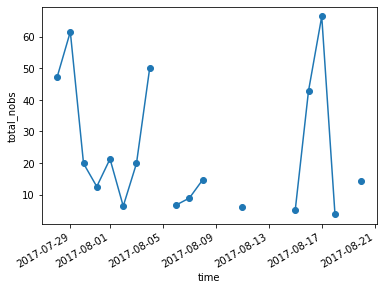

In [9]:
data.total_nobs.mean(dim=('lat','lon')).plot(marker='o')

# What are the details of the chl data?

In [28]:
data.chlor_a

<xarray.DataArray 'chlor_a' (time: 24, lat: 48, lon: 432)>
[497664 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 71.979164 71.9375 71.895836 ... 70.0625 70.020836
  * lon      (lon) float32 -167.97917 -167.9375 ... -150.0625 -150.02083
  * time     (time) datetime64[ns] 2017-07-28 2017-07-29 ... 2017-08-20
Attributes:
    long_name:            Chlorophyll-a concentration in seawater (not log-tr...
    units:                milligram m-3
    ancillary_variables:  chlor_a_log10_rmsd chlor_a_log10_bias
    grid_mapping:         crs
    parameter_vocab_uri:  http://vocab.ndg.nerc.ac.uk/term/P011/current/CHLTVOLU
    standard_name:        mass_concentration_of_chlorophyll_a_in_sea_water
    units_nonstandard:    mg m^-3
    _ChunkSizes:          [  1 270 270]

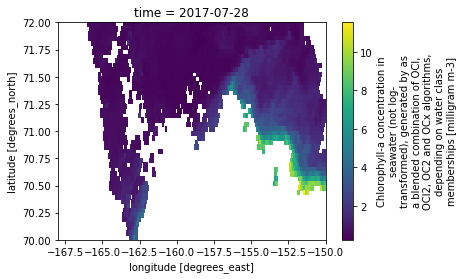

In [7]:
data.chlor_a.sel(time='2017-07-28', method='nearest').plot()

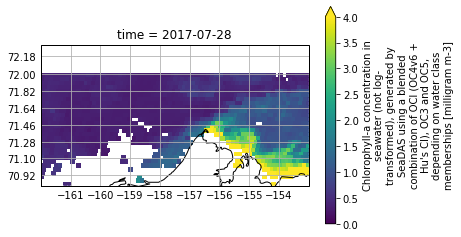

In [30]:
ax = plt.axes(projection=ccrs.Mercator())

data.chlor_a.sel(time='2017-07-28').plot( vmin=0, vmax=4,transform=ccrs.PlateCarree())

ax.coastlines('10m')
gl = ax.gridlines(draw_labels=True, )
gl.xlabels_top = False
gl.ylabels_right = False
ax.set_extent([-162, -153, 70.8, 72.3])

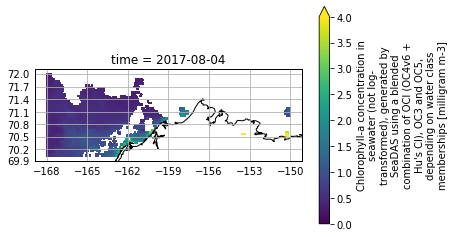

In [38]:
ax = plt.axes(projection=ccrs.Mercator())

data.chlor_a.sel(time='2017-08-16').plot( vmin=0, vmax=4,transform=ccrs.PlateCarree())

ax.coastlines('10m')
gl = ax.gridlines(draw_labels=True, )
gl.xlabels_top = False
gl.ylabels_right = False
# ax.set_extent([-162, -153, 70.8, 72.3])

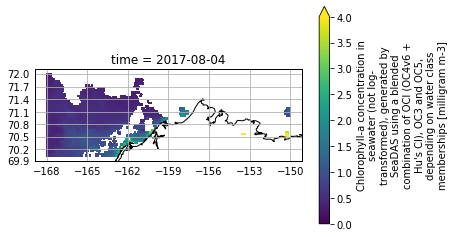

In [39]:
ax = plt.axes(projection=ccrs.Mercator())

data.chlor_a.sel(time='2017-08-04').plot( vmin=0, vmax=4,transform=ccrs.PlateCarree())

ax.coastlines('10m')
gl = ax.gridlines(draw_labels=True, )
gl.xlabels_top = False
gl.ylabels_right = False